##**Fraud detection**

**Anomaly detection in credit cards fraud analysis.**

The aim of this project is predict whether a given transaction was a fraud. In this case we will use anomaly detection techniques such as Isolation Forest, Local Outlier Factor and Support Vector Machine (OneClassSVM) as well. 

Financial fraud is a crime of deceiving people in their transactions.
Frauds in the credit cards industry are stealing or using stolen cards, or take more an aggressive form such as account takeover, counterfeiting and much more. The magnitude of credit card frauds is growing larger each day due to ever-increasing online transactions. 

Anomaly detection is an unsupervised data processing technique to detect anomalies from the dataset. Anomalies are data points that stand out amongst other data points in the dataset and do not fit the normal behavior in the data. These data points or observations deviate from the dataset’s normal behavioral patterns. The anomaly detection is very useful to detect fraud transactions just like in our case.

**Dataset:**

The dataset that is used for credit cards fraud detection is derived from Kagle.

The dataset contains transactions made by credit cards in two days in 2013 by European cardholders. There are 492 frauds out of 284,807 transactions. 

Attributes:

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
- Amount: transaction amount in dollars $$$,
- Time: in seconds elapsed between each transaction and the first transaction in the dataset.
- Class: The column describing our target and it takes value 1 in case of fraud and 0 otherwise. 




### **Import libriaries and data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from numpy import quantile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import linear_model
from sklearn.linear_model import SGDOneClassSVM

from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/moje pliki/data'

/content/drive/My Drive/moje pliki/data


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**First observations:**

In [ ]:
#shape of data
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking missing values:

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset consists only numerical values and majority features (V1 to V28) are the result of ‘Principal Component Analysis (PCA)’ transformation. The ‘Time’ and ‘Amount’ features are not transformed data. There are no missing values in the dataset.


### **Exploratory Data Analysis**


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We are determining the number of fraud and valid transactions in the whole dataset:

In [ ]:
outlier_fraction = len(df_fraud)/float(len(df_normal))

The outlier fraction and number of fraud and valid transaction cases:

In [ ]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(df_fraud)))
print("Normal Cases : {}".format(len(df_normal)))

0.0017304750013189597
Fraud Cases : 492
Normal Cases : 284315


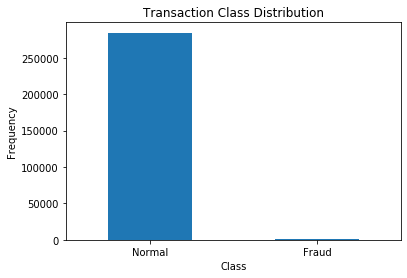

In [ ]:
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels = ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency");

There are 284,315 normal transactions and 492 fraud  transactions. The fraud cases are only 0.172 % from all transactions. We have a very unbalanced dataset and it is a typical in fraud and anomaly detection.




Checking statistics:

In [ ]:
df[['Class', 'Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5']].describe()

,Class,Amount,Time,V1,V2,V3,V4,V5
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,0.001727,88.349619,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15
std,0.041527,250.120109,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02
25%,0.000000,5.600000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01
50%,0.000000,22.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02
75%,0.000000,77.165000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01
max,1.000000,25691.160000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01


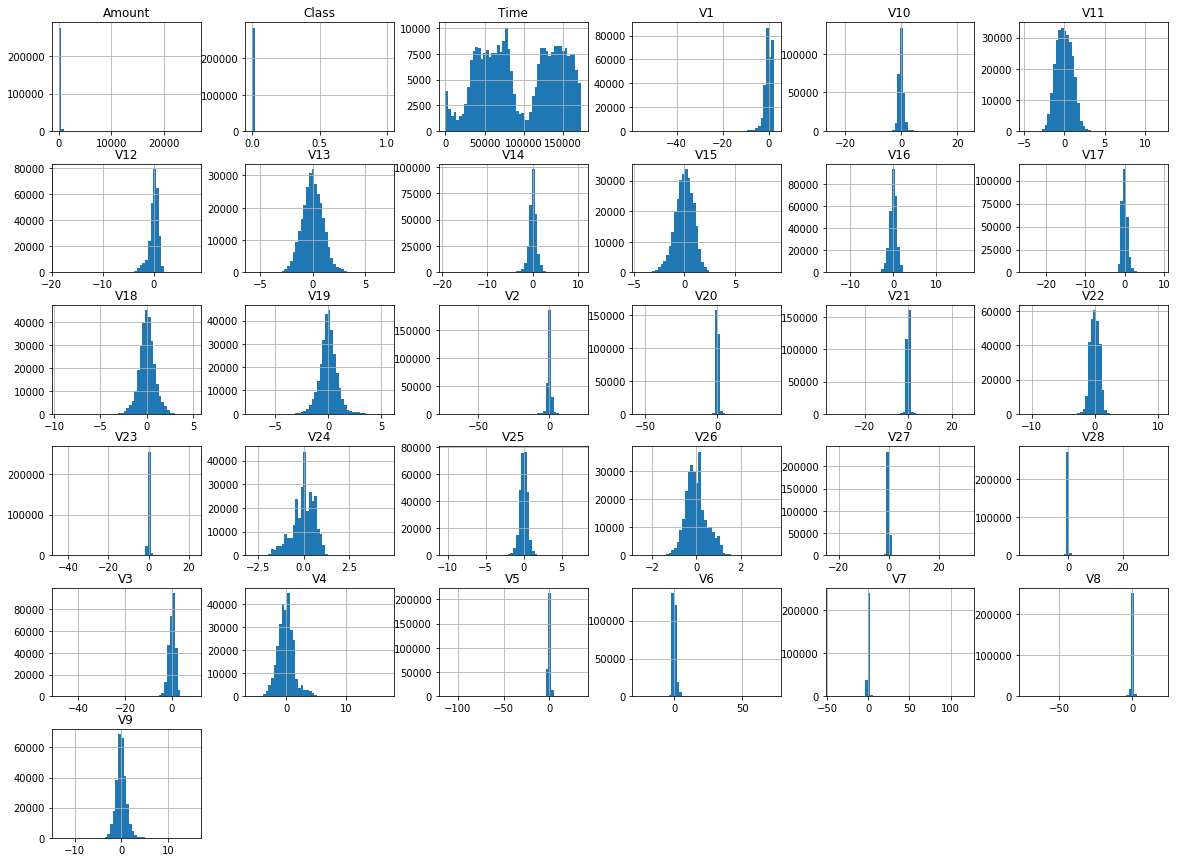

In [ ]:
df.hist(figsize=(20, 15), bins=50);

**Transaction time**

The time of transactions is the time given in seconds from the "zero" hours.


In [ ]:
df['Time'] = df['Time'].apply(lambda x : x / 3600)

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


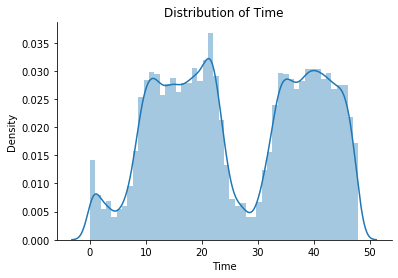

In [ ]:
sns.distplot(df['Time'])
plt.title("Distribution of Time")
sns.despine();

#### **Analysis of the Transaction Amount Data**
Now we divide the dataset into two sets, one for normal transactions and the other one for fraud to compare the distributions with each other.

Assigning the transaction class "0 = normal  & 1 = fraud":

In [ ]:
df_normal = df[df['Class']==0]
df_fraud = df[df['Class']==1]

In [ ]:
print(df_normal.Amount.describe())
print('----------------')
print(df_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
----------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


From above counts we see that the mean is a little higher in the fraud transactions but it is certainly within a standard deviation. Thus it is unlikely to be easy to discriminate in a highly precise manner between the classes with pure statistical methods.


**Transaction by Amount Data**

The most of the transactions in this data were of small amounts and will be generally uninteresting in analysis. Thus we are looking at transactions which are above 100$. The plot of high value transactions:

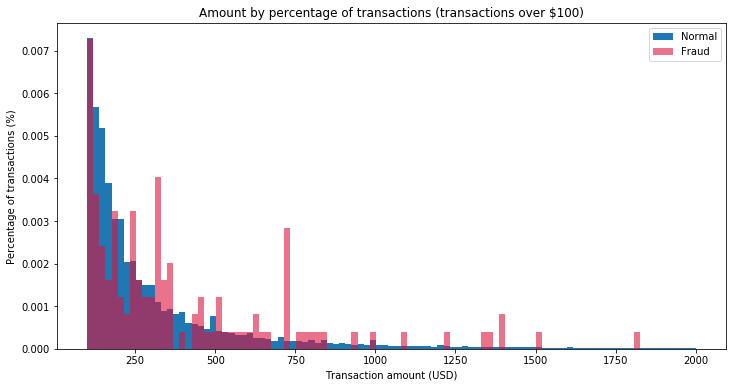

In [ ]:
bins = np.linspace(100, 2000, 100)
plt.figure(figsize=(12, 6))
plt.hist(df_normal.Amount, bins, alpha=1, density=True, label='Normal')
plt.hist(df_fraud.Amount, bins, alpha=0.6, density=True, label='Fraud', color='crimson')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions over \$100)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

Since the fraud cases are relatively few in number compared to valid  data, we see the data look predictably more variable. Probably we are likely observing only a single fraud transaction. It would be hard to differentiate fraud from normal transactions by transaction amount alone.

**Transaction by Hour**

The plot of transaction time by hour (for 48 hours):

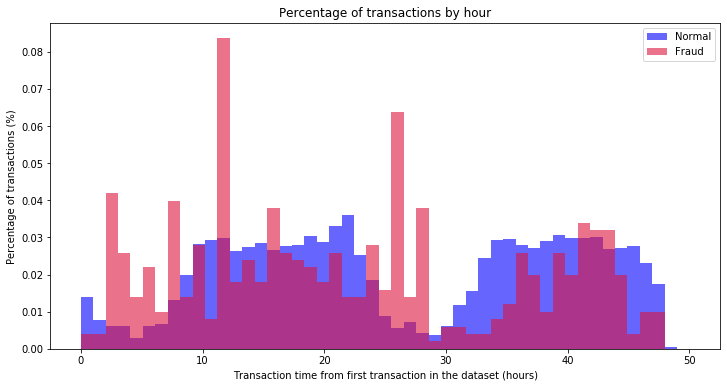

In [ ]:
bins = np.linspace(0, 50, 50) 
plt.figure(figsize=(12, 6))
plt.hist(df_normal.Time, bins, alpha=0.6, density=True, label='Normal', color='blue')
plt.hist(df_fraud.Time, bins, alpha=0.6, density=True, label='Fraud', color='crimson')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

The hour "zero" corresponds to the hour when the first transaction happened. 

Distributions of normal and fraud transactions are not shows significant differences thus based on only transaction time we will not build a good precise classifier.



**Visual Exploration of Transaction Amount vs. Hour**

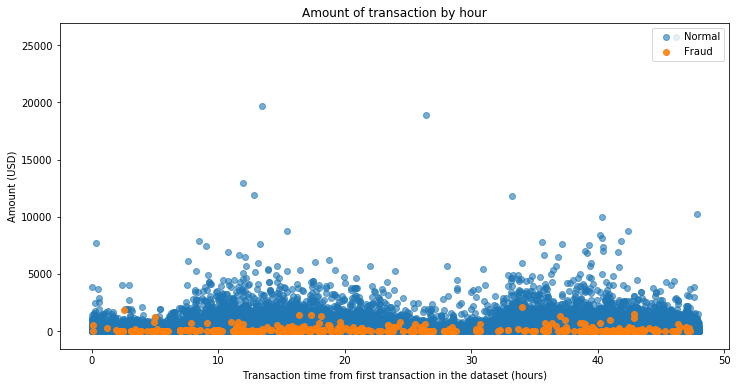

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df_normal.Time, df_normal.Amount, alpha=0.6, label='Normal')
plt.scatter(df_fraud.Time, df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

In this case this is not enough to make a good classifier. It would be hard to draw a line that cleanly separates fraud and normal transactions.

**Correlation Matrix:**

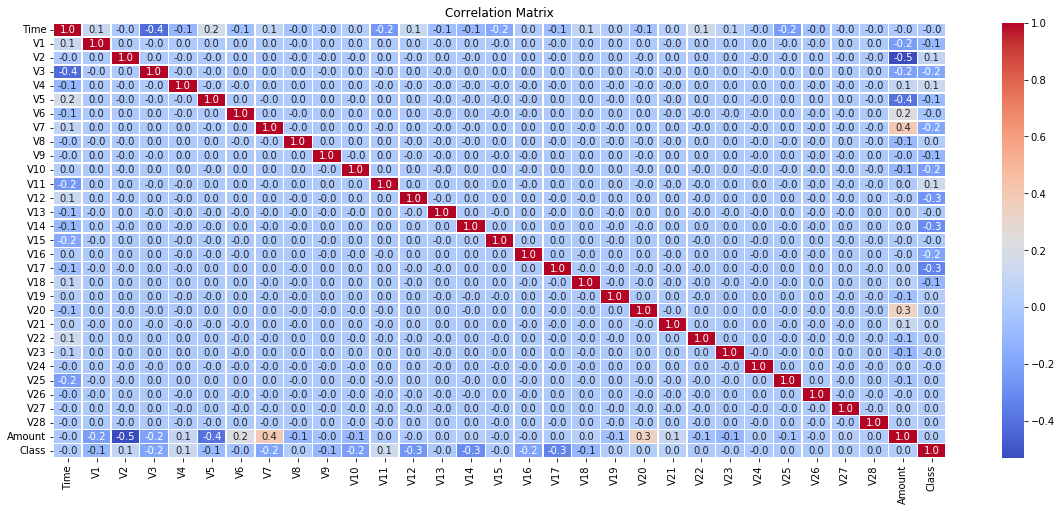

In [ ]:
corr = df.corr()
 
plt.figure(figsize=(20,8))
ax = sns.heatmap(corr.round(2), annot = True, linewidth=0.5, fmt='0.1f', cmap = 'coolwarm')
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
ax.set(title="Correlation Matrix");
plt.show()

The above heatmap shows that none of the V1 to V28 values have any correlation to each other but we can observe the Class has some form positive and negative correlations with the V vaues but has no correlation with Time and Amount.


### **Data preparation**
 
**Data normalization**

The majority of our data are normalized (V1 to V28 values) which are result of PCA analysis. We also have to normalized rest of the data (Time and Amount) so that their high values do not adversely affect the training of the model.


In [ ]:
df_norm = df.copy()

In [ ]:
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

**Now we split dataset into train and test dataset**


We prepare our data assume that frauds are anomalies in our transactions. To better build anomaly detection model we create train data with only normal transactions without fraud. The frauds goes into test data only.

In [ ]:
train, test = train_test_split(df_norm, test_size=0.3, random_state = 10)

In [ ]:
X_train = train[train['Class'] == 0]
X_train = X_train.drop(['Class'], axis=1)
 
X_test = test.drop(['Class'], axis=1)
y_test = test['Class'] 

In [ ]:
print(f'X_train shape: {X_train.shape};')
print(f'X_test shape: {X_test.shape}; y_test shape: {y_test.shape}')

X_train shape: (199013, 30);
X_test shape: (85443, 30); y_test shape: (85443,)


### **Build models**

We will test a three anomaly detection models for our problem.

**1. Isolation Forest Algorithm:**

Isolation Forest is an unsupervised anomaly detection algorithm that uses a random forest algorithm (decision trees) under the hood to detect outliers in the dataset. The algorithm tries to split the data points such that each observation gets isolated from the others.

In [ ]:
model_iF = IsolationForest(n_estimators=20, max_samples='auto', 
                           contamination=0.01, random_state=42, verbose=2)
model_iF.fit(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


IsolationForest(contamination=0.01, n_estimators=20, random_state=42, verbose=2)

Predictions:

In [ ]:
y_pred = model_iF.predict(X_test)

Now we reshape the prediction values to 0 for valid transactions and 1 for fraud transactions:

In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
print("Accuracy Score :")
print(accuracy_score(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test, y_pred))

Accuracy Score :
0.9888346617042941
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85302
           1       0.08      0.53      0.14       141

    accuracy                           0.99     85443
   macro avg       0.54      0.76      0.57     85443
weighted avg       1.00      0.99      0.99     85443



F1 score:

In [ ]:
f1_score(y_test, y_pred)

0.1358695652173913

Confusion matrix:

In [ ]:
if_cm = confusion_matrix(y_test, y_pred)

In [ ]:
def confusion_matrix_plot(cm):
    df_cm = pd.DataFrame(cm,['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (6,4))
    ax = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    plt.show()

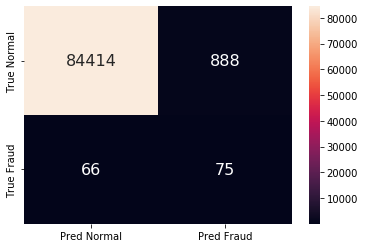

In [ ]:
confusion_matrix_plot(if_cm)

**Model evaluation**

The recall metric answer the question: *What proportion of true anomalies was identified?* 

In the model of anomaly detection it is also important to pay attention to metrics: False Positive and False Negative rates.
False Positive rate helps us understand how many times, on average, will the detector flag the data points that are actually not true anomalies. False Negative rate shows how many anomalies were, on average, missed by the detector. The best model is with the lowest possible False Positive and  False Negatives rates.

In this model the accuracy score is 0,99 and F1 score is 0,14.
The model has a recall values of 53%, meaning that it captures 53% of the anomaly data points. Looking at the confusion matrix we see pretty low False Positive and False Negative rates and 75 frauds correctly classified by the model. The model is pretty good but it could be a better.


**2. Local Outlier Factor**

Local Outlier Factor is an anomaly detection technique that takes the density of data points into consideration to decide whether a point is an anomaly or not. The local outlier factor computes an anomaly score called anomaly score that measures how isolated the point is with respect to the ambient neighborhood. It takes into account the local as well as the global density to compute the anomaly score.


In [ ]:
model_lf = LocalOutlierFactor(n_neighbors=2, contamination=0.1)
model_lf.fit(X_train)

LocalOutlierFactor(contamination=0.1, n_neighbors=2)

Predictions:

In [ ]:
pred_y = model_lf.fit_predict(X_test)

scores_pred = model_lf.negative_outlier_factor_

In [ ]:
scores_pred

array([-0.963436  , -1.66356015, -1.47840219, ..., -1.2933778 ,
       -1.02333547, -1.2375596 ])

In this step we obtain the threshold value from the scores by using the quantile function.  We will get the lowest 3 percent of score values as the anomalies.

In [ ]:
thresh = quantile(scores_pred, .03)
print(thresh)

-2.192363549771904


In [ ]:
pred_y[pred_y == 1] = 0
pred_y[pred_y == -1] = 1

In [ ]:
print("Accuracy Score :")
print(accuracy_score(y_test, pred_y))
print("Classification Report :")
print(classification_report(y_test, pred_y))

Accuracy Score :
0.8985990660440294
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85302
           1       0.00      0.08      0.00       141

    accuracy                           0.90     85443
   macro avg       0.50      0.49      0.47     85443
weighted avg       1.00      0.90      0.95     85443



Confusion matrix:

In [ ]:
lf_cm = confusion_matrix(y_test, pred_y)

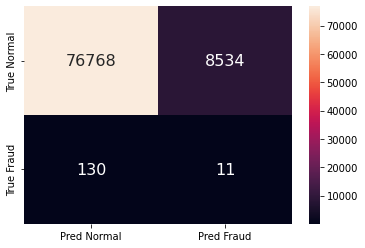

In [ ]:
confusion_matrix_plot(lf_cm)

**Model evaluation**

In this model the accuracy score is 0.90, the recall values of 8%, that means it captures 8% of the anomaly data points. The model is not good despite the high accuracy value. Looking at the confusion matrix we see pretty high False Positive and False Negative rates and only 11 frauds correctly classified by the model. 

**3. One Class SVM (SGD):**

The SVM is an algorithm which tries to find a hyperplane that best separates the two classes of data points. For one-class SVM there are one class of data points, and their task is to predict a hypersphere that separates the cluster of data points from the anomalies. The One-class SVM with SGD solves the linear One-Class SVM using Stochastic Gradient Descent and that model we will use for our problem.


In [ ]:
model_sgd = SGDOneClassSVM(random_state=42, nu = 0.1, fit_intercept=True, shuffle=True, tol=1e-4)
model_sgd.fit(X_train)

SGDOneClassSVM(nu=0.1, random_state=42, tol=0.0001)

In [ ]:
pred = model_sgd.predict(X_test)

In [ ]:
pred[pred == 1] = 0
pred[pred == -1] = 1

In [ ]:
print("Accuracy Score :")
print(accuracy_score(y_test, pred))
print("Classification Report :")
print(classification_report(y_test, pred))

Accuracy Score :
0.9851714008169189
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85302
           1       0.09      0.84      0.16       141

    accuracy                           0.99     85443
   macro avg       0.54      0.91      0.58     85443
weighted avg       1.00      0.99      0.99     85443



Confusion matrix:

In [ ]:
svm_cm = confusion_matrix(y_test, pred)

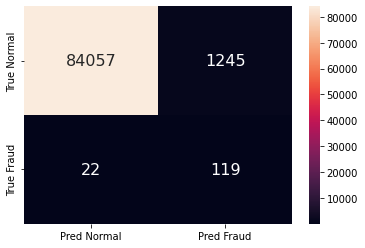

In [ ]:
confusion_matrix_plot(svm_cm)

**Model evaluation**


The SVM model is the best from all previous ones. In the last model the accuracy score is 0.99 and and F1 score is 0.16. The recall values of 84%, that means it captures 84% of the anomaly data points. Looking at the confusion matrix we see pretty low False Negative rate and 119 frauds correctly classified by the model. Only stayed 22 of fraud transactions not correctly classified by the model. We choose that model because it has the lowest possible False Negatives rate and will be not miss many anomalies. 





### **Summary**

This project was aimed to fraud detection in credit cards transactions. We started with data analysis to better meet our data. Then we prepared to the modelling. Following we have used three different anomaly detection models such as Isolation Forest, Local Outlier Factor and SVM (OneClassSVM) to achaived the best model. Finally we evaluated our models with a few methods to check which model is the best. We used a accuracy score, f1 score, recall and confusion matrix. After checked all of this metrics the best model that we got are One Class SVM with recall value 84%, that means it captures 84% of the anomaly data points. That model has the lowest possible False Negatives rate and will be not miss many anomalies. 


